In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [7]:
generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
)

In [8]:
train_generator = generator.flow_from_directory(
    'data/age/train',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)
val_generator = generator.flow_from_directory(
    'data/age/test',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
)

Found 185632 images belonging to 100 classes.
Found 47568 images belonging to 100 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu'),
])

model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [14]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
5801/5801 [==============================] - 1701s 293ms/step - loss: 3676.6189 - mae: 36.7336 - val_loss: 1478.6661 - val_mae: 35.5493
Epoch 2/10
5801/5801 [==============================] - 936s 161ms/step - loss: 1512.1898 - mae: 36.1507 - val_loss: 1478.6647 - val_mae: 35.5493
Epoch 3/10
1907/5801 [========>.....................] - ETA: 15:01 - loss: 1514.9928 - mae: 36.1941

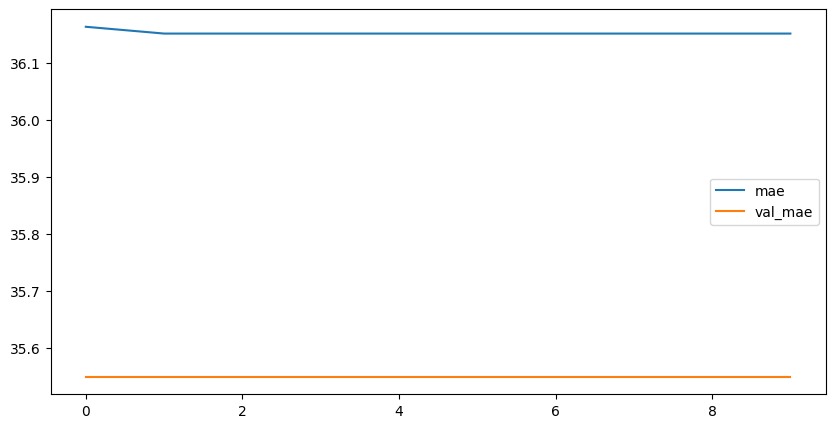

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='mae')
plt.plot(history.history['val_mae'], label='val_mae')
plt.legend()
plt.show()